In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/test.csv', header=None) # Quiz1 , Quiz2, Midterm, Final
df.columns = ['q1', 'q2', 'mid', 'final']
df

,q1,q2,mid,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [8]:
#df.iloc[행, 열]
x = torch.FloatTensor(df.iloc[:,:-1].values)
y = torch.FloatTensor(df.iloc[:,[-1]].values)

In [13]:
# w = torch.empty([행,열], requires_grad=True) # [특성데이터 갯수, 라벨의 갯수]
w = torch.empty([3,1], requires_grad=True)
b = torch.empty(1, requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.7287], requires_grad=True)

In [17]:
def cost():
    hx = torch.matmul(x, w) + b
    c = torch.mean((hx-y)**2)
    return c

In [18]:
optimizer = Adam([w, b], lr = 0.01)
for epoch in range(1000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print(epoch, c.item())

0 4863.73828125
1 4530.42822265625
2 4209.310546875
3 3900.587158203125
4 3604.427490234375
5 3320.980712890625
6 3050.362548828125
7 2792.659423828125
8 2547.923583984375
9 2316.17333984375
10 2097.38818359375
11 1891.5106201171875
12 1698.44189453125
13 1518.0430908203125
14 1350.1351318359375
15 1194.4945068359375
16 1050.857666015625
17 918.9208374023438
18 798.3377075195312
19 688.724609375
20 589.6617431640625
21 500.6932373046875
22 421.3348693847656
23 351.0722961425781
24 289.36846923828125
25 235.66705322265625
26 189.39865112304688
27 149.9820556640625
28 116.83411407470703
29 89.37165069580078
30 67.01918029785156
31 49.21257400512695
32 35.404422760009766
33 25.069744110107422
34 17.70856475830078
35 12.851301193237305
36 10.060663223266602
37 8.934891700744629
38 9.109126091003418
39 10.256692886352539
40 12.089520454406738
41 14.357784271240234
42 16.849037170410156
43 19.386707305908203
44 21.828432083129883
45 24.063426971435547
46 26.00957489013672
47 27.6110954284667

454 8.563126564025879
455 8.562121391296387
456 8.561119079589844
457 8.560128211975098
458 8.559111595153809
459 8.55810832977295
460 8.557101249694824
461 8.556099891662598
462 8.555093765258789
463 8.554072380065918
464 8.553053855895996
465 8.552055358886719
466 8.551033020019531
467 8.550025939941406
468 8.549004554748535
469 8.547989845275879
470 8.546966552734375
471 8.5459566116333
472 8.544940948486328
473 8.543920516967773
474 8.542893409729004
475 8.541879653930664
476 8.540861129760742
477 8.539833068847656
478 8.538805961608887
479 8.537792205810547
480 8.536760330200195
481 8.535746574401855
482 8.534725189208984
483 8.533692359924316
484 8.532662391662598
485 8.53162956237793
486 8.530604362487793
487 8.529574394226074
488 8.528549194335938
489 8.527502059936523
490 8.526463508605957
491 8.525444030761719
492 8.524406433105469
493 8.523365020751953
494 8.52232837677002
495 8.521288871765137
496 8.520252227783203
497 8.519225120544434
498 8.518173217773438
499 8.517138481

904 8.048669815063477
905 8.047447204589844
906 8.046215057373047
907 8.044986724853516
908 8.0437593460083
909 8.042520523071289
910 8.04131031036377
911 8.040075302124023
912 8.038856506347656
913 8.037615776062012
914 8.036393165588379
915 8.035168647766113
916 8.033928871154785
917 8.032703399658203
918 8.03146743774414
919 8.030233383178711
920 8.029008865356445
921 8.027788162231445
922 8.026555061340332
923 8.025330543518066
924 8.024097442626953
925 8.022854804992676
926 8.02163314819336
927 8.020404815673828
928 8.01917839050293
929 8.017938613891602
930 8.016718864440918
931 8.015485763549805
932 8.014253616333008
933 8.013019561767578
934 8.011791229248047
935 8.010550498962402
936 8.009319305419922
937 8.008091926574707
938 8.006866455078125
939 8.005632400512695
940 8.004400253295898
941 8.003166198730469
942 8.001930236816406
943 8.000704765319824
944 7.999474048614502
945 7.998235702514648
946 7.996999740600586
947 7.995770454406738
948 7.994527816772461
949 7.9933071136

In [26]:
def hxFn(xd):
    xd = torch.FloatTensor(xd)
    hx = torch.matmul(xd, w) + b
    return hx.detach().numpy()

In [27]:
w

tensor([[0.5936],
        [0.5259],
        [0.8891]], requires_grad=True)

In [28]:
b

tensor([0.9465], requires_grad=True)

q1: 80 q2: 90 mid: 90 최종점수를 예측하시오

In [30]:
hxFn([[80,90,90]])

array([[175.78345]], dtype=float32)

q1: 80 q2: 90 mid: 90   
q1: 70 q2: 50 mid: 50   
최종점수를 예측하시오   

In [42]:
hxFn([[80,90,90], [70,50,50]])

array([[175.78345],
       [113.24875]], dtype=float32)

In [45]:
pred = hxFn(x)
pred

array([[153.03294],
       [185.11626],
       [181.65201],
       [198.37946],
       [141.22539],
       [105.49904],
       [149.28143],
       [111.64133],
       [174.15442],
       [162.89441],
       [143.6216 ],
       [142.47502],
       [187.01909],
       [154.81654],
       [150.23831],
       [188.30942],
       [147.14812],
       [179.04439],
       [178.02785],
       [159.35689],
       [174.86728],
       [174.24927],
       [166.46967],
       [152.83502],
       [191.30466]], dtype=float32)

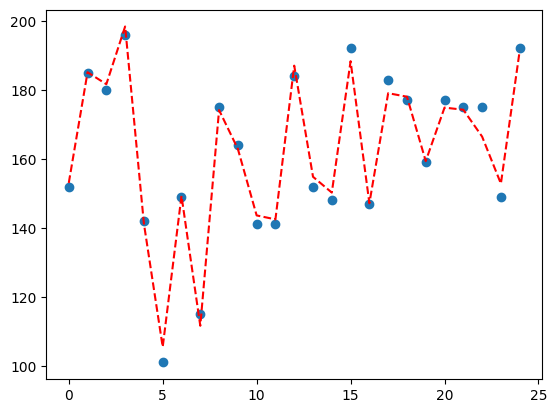

In [51]:
x_axis = torch.arange(0, len(df['q1']))
plt.scatter(x_axis, df['final'])
plt.plot(x_axis, pred, 'r--') # r-- : Red, dashed line
plt.show()